<a href="https://colab.research.google.com/github/Yunus200407/TransportsClassification/blob/main/Rasmlarni_tanish_modeli_without_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import fastai
import torch

In [6]:
from fastai.vision.all import *
#Path
path = untar_data(URLs.MNIST_SAMPLE)

threes=(path/'train'/'3').ls().sorted()
sevens=(path/'train'/'7').ls().sorted()

In [17]:
im3_sample=threes[5]
im3=Image.open(im3_sample)
im3

In [18]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,  62, 239, 252],
       [  0,   0,   0, 162, 252, 252],
       [  0,   0,   0,  40, 217, 252],
       [  0,   0,   0,   0,  38,  99],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]], dtype=uint8)

In [19]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,  62, 239, 252],
        [  0,   0,   0, 162, 252, 252],
        [  0,   0,   0,  40, 217, 252],
        [  0,   0,   0,   0,  38,  99],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0]], dtype=torch.uint8)

In [20]:
import pandas as pd

im3_t=tensor(im3)
df= pd.DataFrame(im3_t[4:21, 4:21])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,0,62,239,252,252,252,252,253,252,223,138,7,0,0,0
1,0,0,0,162,252,252,252,252,252,253,252,252,252,126,0,0,0
2,0,0,0,40,217,252,139,132,132,133,160,252,252,212,35,0,0
3,0,0,0,0,38,99,2,0,0,0,7,173,252,252,205,0,0
4,0,0,0,0,0,0,0,0,0,0,0,48,157,252,222,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,120,252,222,0,0
6,0,0,0,0,0,0,0,0,0,0,0,6,166,252,222,0,0
7,0,0,0,0,0,0,0,0,0,0,0,129,252,252,222,0,0
8,0,0,0,0,0,0,0,0,0,0,36,216,252,252,133,0,0
9,0,0,0,0,0,0,99,219,253,255,253,253,253,253,147,105,6


In [21]:
three_tensors=[tensor(Image.open(i)) for i in threes]
seven_tensors=[tensor(Image.open(i)) for i in sevens]

len(three_tensors),len(seven_tensors)

(6131, 6265)

In [22]:
stacked_three=torch.stack(three_tensors).float()/255
stacked_seven=torch.stack(seven_tensors).float()/255
stacked_three.shape, stacked_seven.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [24]:
mean3=stacked_three.mean(0)
mean7=stacked_seven.mean(0)
mean3.shape, mean7.shape

(torch.Size([28, 28]), torch.Size([28, 28]))

<Axes: >

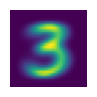

In [25]:
show_image(mean3)

<Axes: >

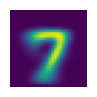

In [26]:
show_image(mean7)

<Axes: >

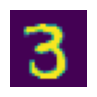

In [31]:
s_3=stacked_three[6]
show_image(s_3)

In [32]:
#mae
mae=(s_3-mean3).abs().mean()

#rmse
rmse=((s_3-mean3)**2).mean().sqrt()

mae,rmse

(tensor(0.1158), tensor(0.2104))

In [33]:
#mae
mae=(s_3-mean7).abs().mean()

#rmse
rmse=((s_3-mean7)**2).mean().sqrt()

mae,rmse

(tensor(0.1760), tensor(0.3259))

In [36]:
valid_3_tens=torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'3').ls()])
valid_3_tens=valid_3_tens.float()/255
valid_7_tens=torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'7').ls()])
valid_7_tens=valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [41]:
#MAE
def mae(a,b):
  return (a-b).abs().mean((-1, -2))

mae(s_3, mean3)

valid_3_errors=mae(valid_3_tens, mean3)
valid_7_errors=mae(valid_7_tens, mean7)
valid_3_errors, valid_3_errors.shape

(tensor([0.1111, 0.1230, 0.1109,  ..., 0.1818, 0.1430, 0.1131]),
 torch.Size([1010]))

In [43]:
def is_3(x):
  return mae(x, mean3) < mae(x, mean7)

def is_7(x):
  return mae(x, mean7) <mae(x, mean3)

is_3(s_3), is_7(s_3).float()

(tensor(True), tensor(0.))

In [45]:
accruncy_3_s=(is_3(valid_3_tens).float()).mean()
accruncy_7_s=(is_7(valid_7_tens).float()).mean()
accruncy_3_s, accruncy_7_s, (accruncy_3_s+accruncy_7_s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [47]:
accruncy_3_s1=(is_3(valid_3_tens).float())
accruncy_7_s1=(is_7(valid_7_tens).float())
accruncy_3_s1, accruncy_7_s1

(tensor([1., 1., 1.,  ..., 0., 1., 1.]),
 tensor([1., 1., 1.,  ..., 1., 1., 1.]))

In [56]:
accruncy_3_s1[-3]

tensor(0.)

In [55]:
accruncy_7_s1[297]

tensor(1.)